<a href="https://colab.research.google.com/github/yumeniown/attestation3/blob/main/attestation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Промежуточная аттестация по сетям искусcтвенных нейронов 3.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 в оттенках серого. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
```
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
```

1. Визаулизация датасета
2. Предобработка
3. Создайте модель
4. Тренировка модели
5. Оценка модели
6. Обязательно нужны выводы!


**1. Визаулизация датасета**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


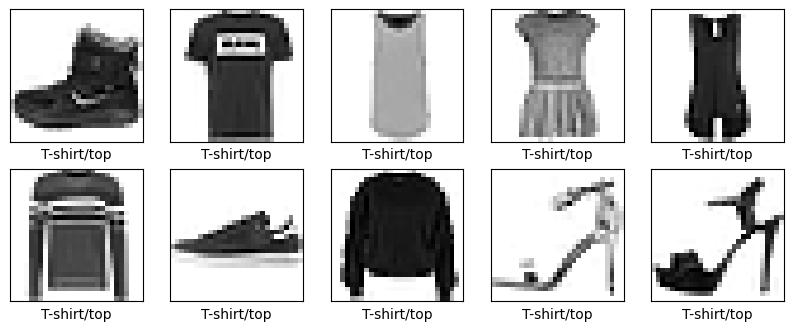

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i].argmax()])

plt.show()

Качество, конечно, обнадеживает, однако, теперь можно оценить визуально классы одежд из обучающего набора

**2. Предобработка**

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# для CNN добавим размерность канала, изменив форму данных
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# преобразуем метки в категориальный формат
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
print(f'Обучающая выборка: {x_train.shape}, Тестовая выборка: {x_test.shape}')

Обучающая выборка: (60000, 28, 28, 1), Тестовая выборка: (10000, 28, 28, 1)



Данные успешно подготовлены для использования в сверточной нейронной сети для набора данных Fashion MNIST

**3. Создайте модель**

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Применены сверточные слои Conv2D. слои подвыборки MaxPooling2D, плоский слой Flatten для передачи данных в полносвязные слои, и, собственно, полносвязный слой Dense с активацией Relu, выходной слой с активацией Softmax, что позволяет эффективно извлекать признаки из изображений и классифицировать их по 10 классам одежды

**4. Тренировка модели**

In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6938 - loss: 0.8539 - val_accuracy: 0.8493 - val_loss: 0.4220
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8575 - loss: 0.3979 - val_accuracy: 0.8799 - val_loss: 0.3396
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8850 - loss: 0.3190 - val_accuracy: 0.8777 - val_loss: 0.3275
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8948 - loss: 0.2869 - val_accuracy: 0.8915 - val_loss: 0.3016
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9017 - loss: 0.2674 - val_accuracy: 0.8984 - val_loss: 0.2776
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9127 - loss: 0.2329 - val_accuracy: 0.9031 - val_loss: 0.2795
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9179 - loss: 0.2243 - val_accuracy: 0.9032 - val_loss: 0.2710
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9286 - loss: 0.1970 - val_accuracy: 0.

**4. Тренировка модели**

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6938 - loss: 0.8539 - val_accuracy: 0.8493 - val_loss: 0.4220
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8575 - loss: 0.3979 - val_accuracy: 0.8799 - val_loss: 0.3396
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8850 - loss: 0.3190 - val_accuracy: 0.8777 - val_loss: 0.3275
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8948 - loss: 0.2869 - val_accuracy: 0.8915 - val_loss: 0.3016
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9017 - loss: 0.2674 - val_accuracy: 0.8984 - val_loss: 0.2776
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9127 - loss: 0.2329 - val_accuracy: 0.9031 - val_loss: 0.2795
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9179 - loss: 0.2243 - val_accuracy: 0.9032 - val_loss: 0.2710
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9286 - loss: 0.1970 - val_accuracy: 0.

После тренировки модели в количество 10 эпох видно улучшение точности на обучающей выборке с 69% до ~94%, а потери снизились с 0.8539 до 0.1722, а валидационная точность увеличилась с ~85% до 90%, что указывает на успешное обучение модели на новых данных

**6. Оценка модели**

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nОценка точности модели: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8981 - loss: 0.3041

Оценка точности модели: 0.9007


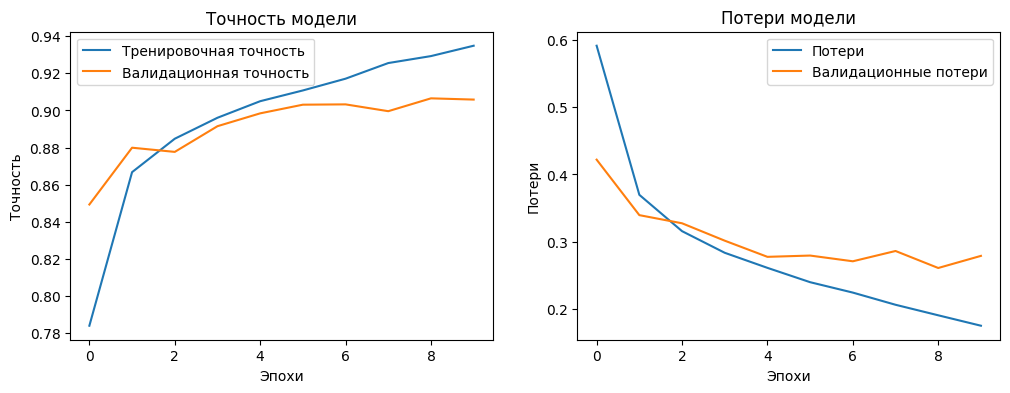

In [20]:
plt.figure(figsize=(12, 4))

# визуализируем график точности во время обучения
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренировочная точность')
plt.plot(history.history['val_accuracy'], label='Валидационная точность')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

# визуализируем график потерь во время обучения
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери')
plt.plot(history.history['val_loss'], label='Валидационные потери')
plt.title('Потери модели')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

После оценки модели на тестовой выборке результаты показывают, что точность составляет ~90%, а потери равны ~30% что говорит о том, что модель хорошо обучена на новых данных и имеет хорошую способность к обобщению. Точность чуть ниже по сравнению с валидационной выборкой ~90%, что может указывать на небольшое переобучение на тренировочных данных. По итогу, результаты подтверждают, что модель хорошо справляется с задачей классификации изображений с разным типом одежды